<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(3_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.066448,29.514032,38.415487,-539.715572,-367.719605,-614.224988,246.505383
1,0.0,1.0,93.841476,55.391297,77.757558,22.161525,259.151856,752.035024,-492.883168
2,0.0,2.0,72.402016,53.439430,23.826671,122.689362,282.357479,36.004739,246.352739
3,0.0,3.0,88.739847,94.224030,45.067604,-1434.090097,-1196.058616,1657.592091,-2853.650707
4,0.0,4.0,28.125903,22.956163,38.039019,-369.818840,-270.697755,-759.367411,488.669655
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,80.590224,20.817420,38.227828,-306.024046,-156.388573,-331.173170,174.784597
59996,999.0,56.0,22.578518,67.954840,69.419614,1274.890780,1444.843753,533.363667,911.480086
59997,999.0,57.0,28.960053,68.876005,58.923829,-6115.219951,-5948.460064,426.908160,-6375.368224
59998,999.0,58.0,38.887209,29.210672,86.526663,-47.147381,117.477162,308.171441,-190.694279


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    94.066448  29.514032  38.415487  -539.715572  -367.719605   
      1.0    93.841476  55.391297  77.757558    22.161525   259.151856   
      2.0    72.402016  53.439430  23.826671   122.689362   282.357479   
      3.0    88.739847  94.224030  45.067604 -1434.090097 -1196.058616   
      4.0    28.125903  22.956163  38.039019  -369.818840  -270.697755   
...                ...        ...        ...          ...          ...   
999.0 55.0   80.590224  20.817420  38.227828  -306.024046  -156.388573   
      56.0   22.578518  67.954840  69.419614  1274.890780  1444.843753   
      57.0   28.960053  68.876005  58.923829 -6115.219951 -5948.460064   
      58.0   38.887209  29.210672  86.526663   -47.147381   117.477162   
      59.0   89.530127  73.472477  25.760391 -1713.484188 -1514.721192   

                   y_hat        e_hat  
rep   index                            
0.0   0.0    -614.224988   246.505383  
      1.0     752.035024  -492.883168  
      2.0      36.004739   246.352739  
      3.0    1657.592091 -2853.650707  
      4.0    -759.367411   488.669655  
...                  ...          ...  
999.0 55.0   -331.173170   174.784597  
      56.0    533.363667   911.480086  
      57.0    426.908160 -6375.368224  
      58.0    308.171441  -190.694279  
      59.0    -72.104953 -1442.616240  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    94.066448  29.514032  38.415487  -539.715572  -367.719605   
      1.0    93.841476  55.391297  77.757558    22.161525   259.151856   
      2.0    72.402016  53.439430  23.826671   122.689362   282.357479   
      3.0    88.739847  94.224030  45.067604 -1434.090097 -1196.058616   
      4.0    28.125903  22.956163  38.039019  -369.818840  -270.697755   
...                ...        ...        ...          ...          ...   
999.0 55.0   80.590224  20.817420  38.227828  -306.024046  -156.388573   
      56.0   22.578518  67.954840  69.419614  1274.890780  1444.843753   
      57.0   28.960053  68.876005  58.923829 -6115.219951 -5948.460064   
      58.0   38.887209  29.210672  86.526663   -47.147381   117.477162   
      59.0   89.530127  73.472477  25.760391 -1713.484188 -1514.721192   

                   y_hat        e_hat  
rep   index                            
0.0   0.0    -614.224988   246.505383  
      1.0     752.035024  -492.883168  
      2.0      36.004739   246.352739  
      3.0    1657.592091 -2853.650707  
      4.0    -759.367411   488.669655  
...                  ...          ...  
999.0 55.0   -331.173170   174.784597  
      56.0    533.363667   911.480086  
      57.0    426.908160 -6375.368224  
      58.0    308.171441  -190.694279  
      59.0    -72.104953 -1442.616240  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.066448,29.514032,38.415487,-539.715572,-367.719605,-614.224988,246.505383
1,0.0,1.0,93.841476,55.391297,77.757558,22.161525,259.151856,752.035024,-492.883168
2,0.0,2.0,72.402016,53.439430,23.826671,122.689362,282.357479,36.004739,246.352739
3,0.0,3.0,88.739847,94.224030,45.067604,-1434.090097,-1196.058616,1657.592091,-2853.650707
4,0.0,4.0,28.125903,22.956163,38.039019,-369.818840,-270.697755,-759.367411,488.669655
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,80.590224,20.817420,38.227828,-306.024046,-156.388573,-331.173170,174.784597
59996,999.0,56.0,22.578518,67.954840,69.419614,1274.890780,1444.843753,533.363667,911.480086
59997,999.0,57.0,28.960053,68.876005,58.923829,-6115.219951,-5948.460064,426.908160,-6375.368224
59998,999.0,58.0,38.887209,29.210672,86.526663,-47.147381,117.477162,308.171441,-190.694279


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    94.066448  29.514032  38.415487  -539.715572  -367.719605   
      1.0    93.841476  55.391297  77.757558    22.161525   259.151856   
      2.0    72.402016  53.439430  23.826671   122.689362   282.357479   
      3.0    88.739847  94.224030  45.067604 -1434.090097 -1196.058616   
      4.0    28.125903  22.956163  38.039019  -369.818840  -270.697755   
...                ...        ...        ...          ...          ...   
999.0 55.0   80.590224  20.817420  38.227828  -306.024046  -156.388573   
      56.0   22.578518  67.954840  69.419614  1274.890780  1444.843753   
      57.0   28.960053  68.876005  58.923829 -6115.219951 -5948.460064   
      58.0   38.887209  29.210672  86.526663   -47.147381   117.477162   
      59.0   89.530127  73.472477  25.760391 -1713.484188 -1514.721192   

                   y_hat        e_hat  
rep   index                            
0.0   0.0    -614.224988   246.505383  
      1.0     752.035024  -492.883168  
      2.0      36.004739   246.352739  
      3.0    1657.592091 -2853.650707  
      4.0    -759.367411   488.669655  
...                  ...          ...  
999.0 55.0   -331.173170   174.784597  
      56.0    533.363667   911.480086  
      57.0    426.908160 -6375.368224  
      58.0    308.171441  -190.694279  
      59.0    -72.104953 -1442.616240  

[60000 rows x 7 columns]

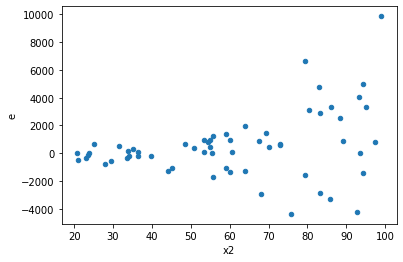

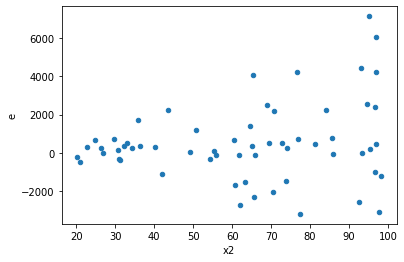

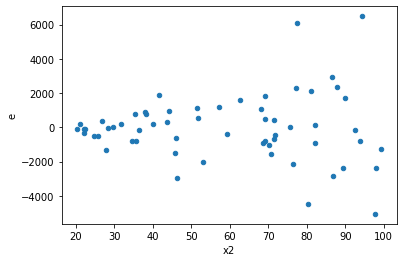

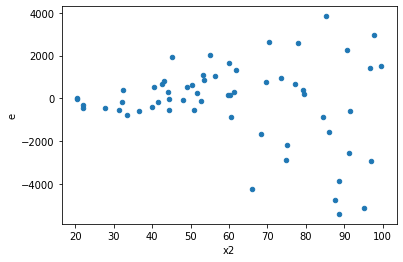

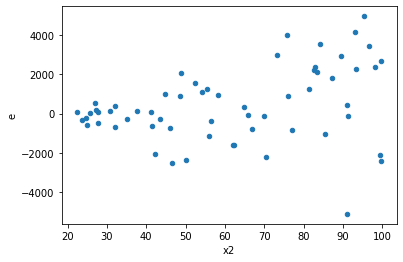

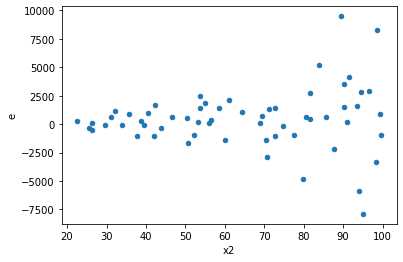

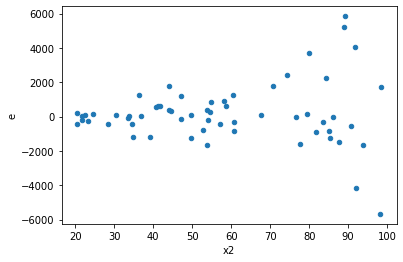

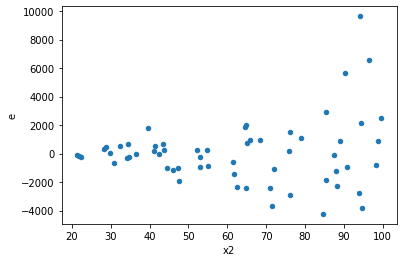

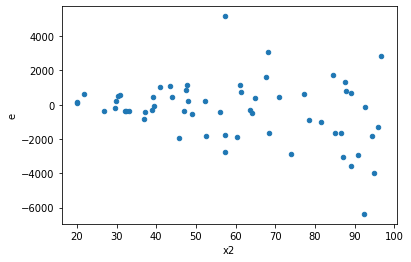

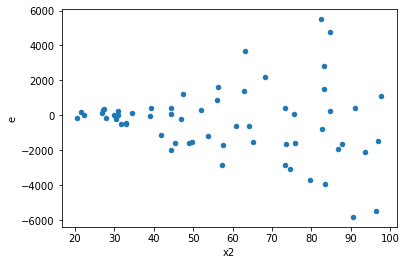

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,33.0,6215241.635829124,255021088.99229896,295963.88742043445,7727911.787645423,26.110995685995505,1.3766765505351941e-14,0.9999999999999931,6.8833827526759706e-15,Reject001=0 : Heteroscedasticity
3.0,34.0,20.0,58644384.5726255,130807343.97174464,1724834.8403713384,6540367.198587232,3.7918802690576228,0.0025782550284039196,0.998710872485798,0.0012891275142019598,Reject001=0 : Heteroscedasticity
5.0,29.0,25.0,40202135.824813135,336401635.5145068,1386280.5456832116,13456065.420580273,9.706596159400487,1.758119292372129e-07,0.9999999120940354,8.790596461860645e-08,Reject001=0 : Heteroscedasticity
6.0,25.0,29.0,37549020.71951906,90939298.42827834,1501960.8287807622,3135837.876837184,2.0878293339931804,0.05804308296307159,0.9709784585184642,0.029021541481535795,Reject001=1 : Homoscedasticity
7.0,25.0,29.0,33870375.269586794,227682834.49909055,1354815.0107834719,7851132.224106571,5.794984674377326,1.3295469530438808e-05,0.9999933522652348,6.647734765219404e-06,Reject001=0 : Heteroscedasticity
10.0,32.0,22.0,45300325.30818688,139352822.13800016,1415635.16588084,6334219.188090917,4.474471488668921,0.0005205532978180827,0.999739723351091,0.00026027664890904134,Reject001=0 : Heteroscedasticity
11.0,29.0,25.0,105894663.02017592,98866560.77666938,3651540.104143997,3954662.431066775,1.0830121861673587,0.8454700745352413,0.5772649627323794,0.42273503726762063,Reject001=1 : Homoscedasticity
16.0,25.0,29.0,76096716.67352922,204674182.52292693,3043868.6669411687,7057730.431825066,2.3186711399468787,0.03080107203059068,0.9845994639847047,0.01540053601529534,Reject001=1 : Homoscedasticity
20.0,27.0,27.0,32659271.52705591,107415859.83928847,1209602.649150219,3978365.1792329066,3.2889851737906026,0.0028677381111064104,0.9985661309444468,0.0014338690555532052,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,33.0,6215241.635829124,255021088.99229896,295963.88742043445,7727911.787645423,26.110995685995505,1.3766765505351941e-14,Reject001=0 : Heteroscedasticity
1.0,25.0,29.0,174451054.3427105,32019417.19970376,6978042.17370842,1104117.8344725436,0.15822745219749362,1.299547356759146e-05,Reject001=0 : Heteroscedasticity
2.0,34.0,20.0,153198014.48868608,53544862.45534186,4505823.95554959,2677243.122767093,0.594173928936942,0.1767288011191511,Reject001=1 : Homoscedasticity
3.0,34.0,20.0,58644384.5726255,130807343.97174464,1724834.8403713384,6540367.198587232,3.7918802690576228,0.0025782550284039196,Reject001=0 : Heteroscedasticity
4.0,30.0,24.0,95108621.50547741,59312952.98016859,3170287.383515914,2471373.040840358,0.7795422754701671,0.5133520583880329,Reject001=1 : Homoscedasticity
5.0,29.0,25.0,40202135.824813135,336401635.5145068,1386280.5456832116,13456065.420580273,9.706596159400487,1.758119292372129e-07,Reject001=0 : Heteroscedasticity
6.0,25.0,29.0,37549020.71951906,90939298.42827834,1501960.8287807622,3135837.876837184,2.0878293339931804,0.05804308296307159,Reject001=1 : Homoscedasticity
7.0,25.0,29.0,33870375.269586794,227682834.49909055,1354815.0107834719,7851132.224106571,5.794984674377326,1.3295469530438808e-05,Reject001=0 : Heteroscedasticity
8.0,25.0,29.0,106466779.2832715,55243092.19662001,4258671.17133086,1904934.213676552,0.44730718504412,0.04444696014361177,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      508
Reject001=0 : Heteroscedasticity    492
Name: Result_test, dtype: int64